In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import sys
sys.path.append('../')

import lib.fun_plotting as fun_plotting
from lib.ml_wrapper import asynch_reconstruction

from lib.hmm_wrapper import binomial_HMM

from sklearn.decomposition import PCA

matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rc('text', usetex=True)

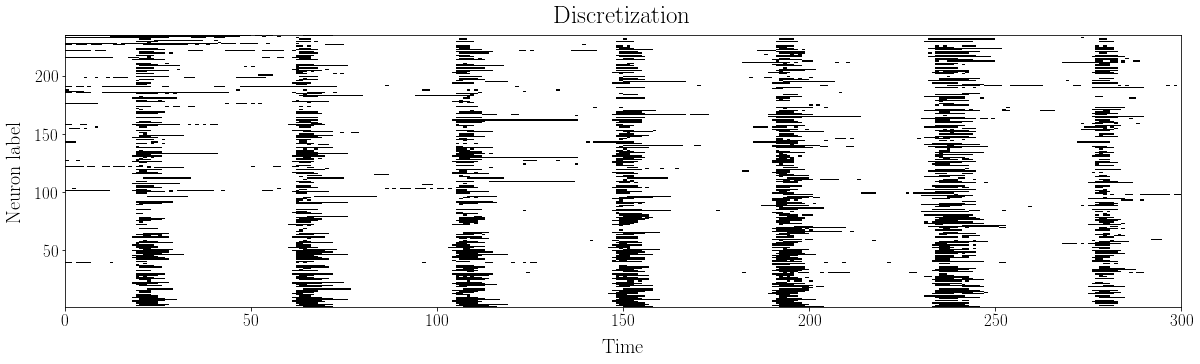

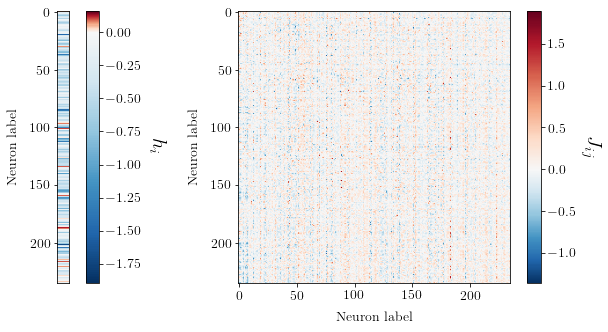

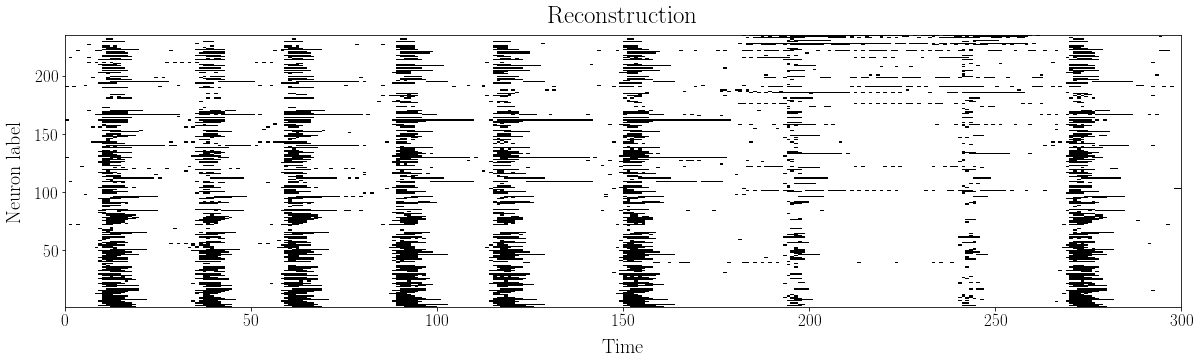

In [4]:
Nepochs = 800
LAMBDA = 0.05
lr = 0.5
drop = 0.8
edrop = 20

s = str(Nepochs)+'_'+str(LAMBDA)+'_'+str(lr)+'_'+str(drop)+'_'+str(edrop)+'.npy'

data_discrete = np.load('experimental_data/data_discrete.npy')
model = asynch_reconstruction(data_discrete, delta_t = 1, LAMBDA = LAMBDA, opt = 'NADAM', reg = 'L1')

model.load_parameters(J = np.load('model_parameters/J' + s), h = np.load('model_parameters/h' + s))

fun_plotting.raster_plot(data_discrete, 'Discretization', delta_t = 1)
plt.show()

model.plot_fields_and_couplings()
plt.show()

fun_plotting.raster_plot(model.generate_samples(), 'Reconstruction', delta_t = 1)
plt.show()

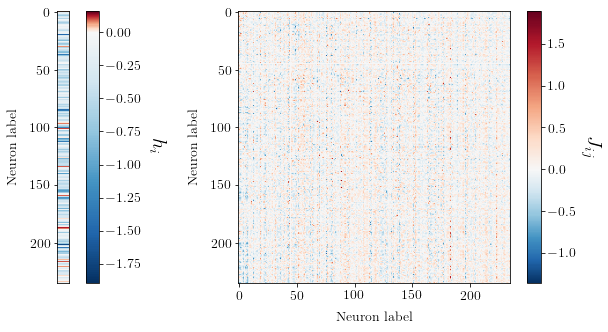

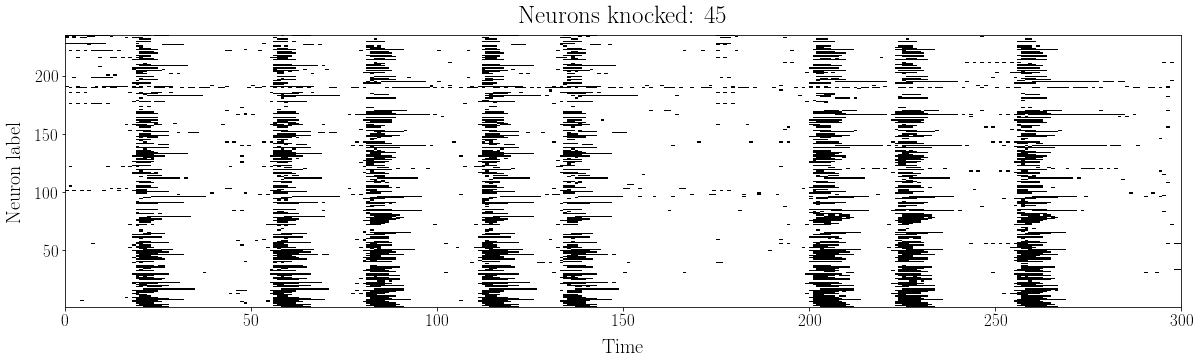

In [11]:
_, _, spins_knock = model.knockout_neurons([45], Nsteps = 300)

In [18]:
N_neurons = data_discrete.shape[0]

In [16]:
import time as measure_time

def train_hmm(neurons, N_hidden = 2, nepochs = 10, nrep = 4):
    data = neurons.T.copy()
    data[data == -1] = 0
    D = data.shape[1]

    best_cv_likelihood = -np.inf

    for i in range(nrep):
        hmm = binomial_HMM(N_hidden, D)

        for _ in range(nepochs):
            hmm.update(data, print_results = False)

        if hmm.best_likelihood > best_cv_likelihood:
            best_cv_likelihood = hmm.best_likelihood
            best_hmm = hmm

    return best_hmm

def knock_and_fit(idx, model, Nsteps = 10000):
    _, _, spins_knock = model.knockout_neurons([idx], Nsteps = Nsteps, plot = False)

    _, _ = fun_plotting.raster_plot(spins_knock, title = 'Knocked neuron label ' +str(idx))
    plt.savefig('img/raster_plot_k'+str(idx)+'.jpg', dpi = 150, bbox_inches = 'tight')
    plt.close()

    hmm_knock = train_hmm(spins_knock)
    hmm_knock.sort_states()
    np.save('model_parameters/task_k'+str(idx)+'_best_log_emission_matrix.npy', hmm_knock.best_log_emission_matrix)
    np.save('model_parameters/task_k'+str(idx)+'_best_log_transition_matrix.npy', hmm_knock.best_log_transition_matrix)
    np.save('model_parameters/task_k'+str(idx)+'_best_log_state_priors.npy', hmm_knock.best_log_state_priors)

for idx in range(N_neurons):
    print('Training HMM model with neuron ' + str(idx) + ' knocked...')

    t0 = measure_time.time()
    knock_and_fit(idx, model)
    t1 = measure_time.time()

    print('Completed in CPU time ' + str(t1-t0))
    print()

Training HMM model with neuron 0 knocked...
Completed in CPU time 8.626542568206787

Training HMM model with neuron 1 knocked...
Completed in CPU time 8.418148040771484

Training HMM model with neuron 2 knocked...
Completed in CPU time 8.57358694076538

Training HMM model with neuron 3 knocked...
Completed in CPU time 8.83345913887024

Training HMM model with neuron 4 knocked...
Completed in CPU time 8.775300741195679

Training HMM model with neuron 5 knocked...
Completed in CPU time 9.016511917114258

Training HMM model with neuron 6 knocked...
Completed in CPU time 8.889681816101074

Training HMM model with neuron 7 knocked...
Completed in CPU time 8.816412448883057

Training HMM model with neuron 8 knocked...
Completed in CPU time 9.447530031204224

Training HMM model with neuron 9 knocked...
Completed in CPU time 9.644310235977173

Training HMM model with neuron 10 knocked...
Completed in CPU time 10.161538124084473

Training HMM model with neuron 11 knocked...
Completed in CPU tim

Completed in CPU time 8.941087007522583

Training HMM model with neuron 96 knocked...
Completed in CPU time 9.042094230651855

Training HMM model with neuron 97 knocked...
Completed in CPU time 9.455480813980103

Training HMM model with neuron 98 knocked...
Completed in CPU time 9.38020658493042

Training HMM model with neuron 99 knocked...
Completed in CPU time 9.312378406524658

Training HMM model with neuron 100 knocked...
Completed in CPU time 9.239491701126099

Training HMM model with neuron 101 knocked...
Completed in CPU time 9.177869081497192

Training HMM model with neuron 102 knocked...
Completed in CPU time 9.448787212371826

Training HMM model with neuron 103 knocked...
Completed in CPU time 9.678349733352661

Training HMM model with neuron 104 knocked...
Completed in CPU time 11.214891195297241

Training HMM model with neuron 105 knocked...
Completed in CPU time 11.2454514503479

Training HMM model with neuron 106 knocked...
Completed in CPU time 10.836113691329956

Traini

Completed in CPU time 9.553450584411621

Training HMM model with neuron 190 knocked...
Completed in CPU time 9.863282203674316

Training HMM model with neuron 191 knocked...
Completed in CPU time 9.768524646759033

Training HMM model with neuron 192 knocked...
Completed in CPU time 9.925282716751099

Training HMM model with neuron 193 knocked...
Completed in CPU time 9.23011589050293

Training HMM model with neuron 194 knocked...
Completed in CPU time 9.566833257675171

Training HMM model with neuron 195 knocked...
Completed in CPU time 9.228740930557251

Training HMM model with neuron 196 knocked...
Completed in CPU time 8.999212980270386

Training HMM model with neuron 197 knocked...
Completed in CPU time 9.244777917861938

Training HMM model with neuron 198 knocked...
Completed in CPU time 9.387614488601685

Training HMM model with neuron 199 knocked...
Completed in CPU time 9.970651388168335

Training HMM model with neuron 200 knocked...
Completed in CPU time 11.19479751586914

Tra

IndexError: index 235 is out of bounds for axis 1 with size 235

In [19]:
spins = model.generate_samples(10000)

hmm = train_hmm(spins)
hmm.sort_states()
np.save('model_parameters/task_all_best_log_emission_matrix.npy', hmm.best_log_emission_matrix)
np.save('model_parameters/task_all_best_log_transition_matrix.npy', hmm.best_log_transition_matrix)
np.save('model_parameters/task_all_best_log_state_priors.npy', hmm.best_log_state_priors)